## Opening and CLosing


In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image_path = "images/circle.jpg"

# Read a binary image
image = cv2.imread(image_path)

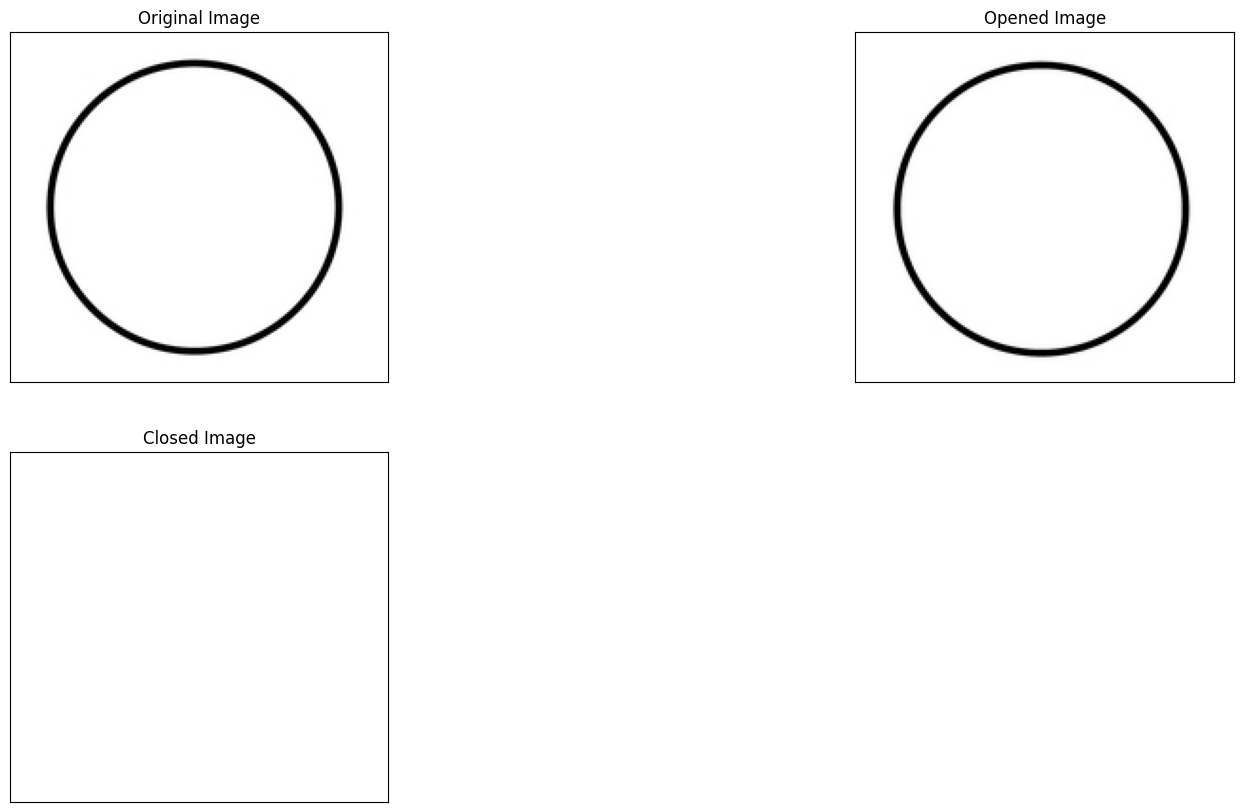

In [3]:
# Define a kernel (structuring element)
kernel = np.ones((6, 6), np.uint8)

# Perform opening operation
opened_image = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

# Perform closing operation
closed_image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)


# Display the original image, the opened image and the closed one
plt.figure(figsize=(20, 10))
plt.subplot(221), plt.imshow(image)
plt.title("Original Image"), plt.xticks([]), plt.yticks([])

plt.subplot(222), plt.imshow(opened_image)
plt.title("Opened Image"), plt.xticks([]), plt.yticks([])

plt.subplot(223), plt.imshow(closed_image)
plt.title("Closed Image"), plt.xticks([]), plt.yticks([])


plt.show()

# Canny Edge Detection

### Algorithm:

1. Filter image with derivative of Gaussian
2. Find magnitude and orientation of gradient
3. Non-maximum suppression
4. Linking and thresholding (hysteresis)


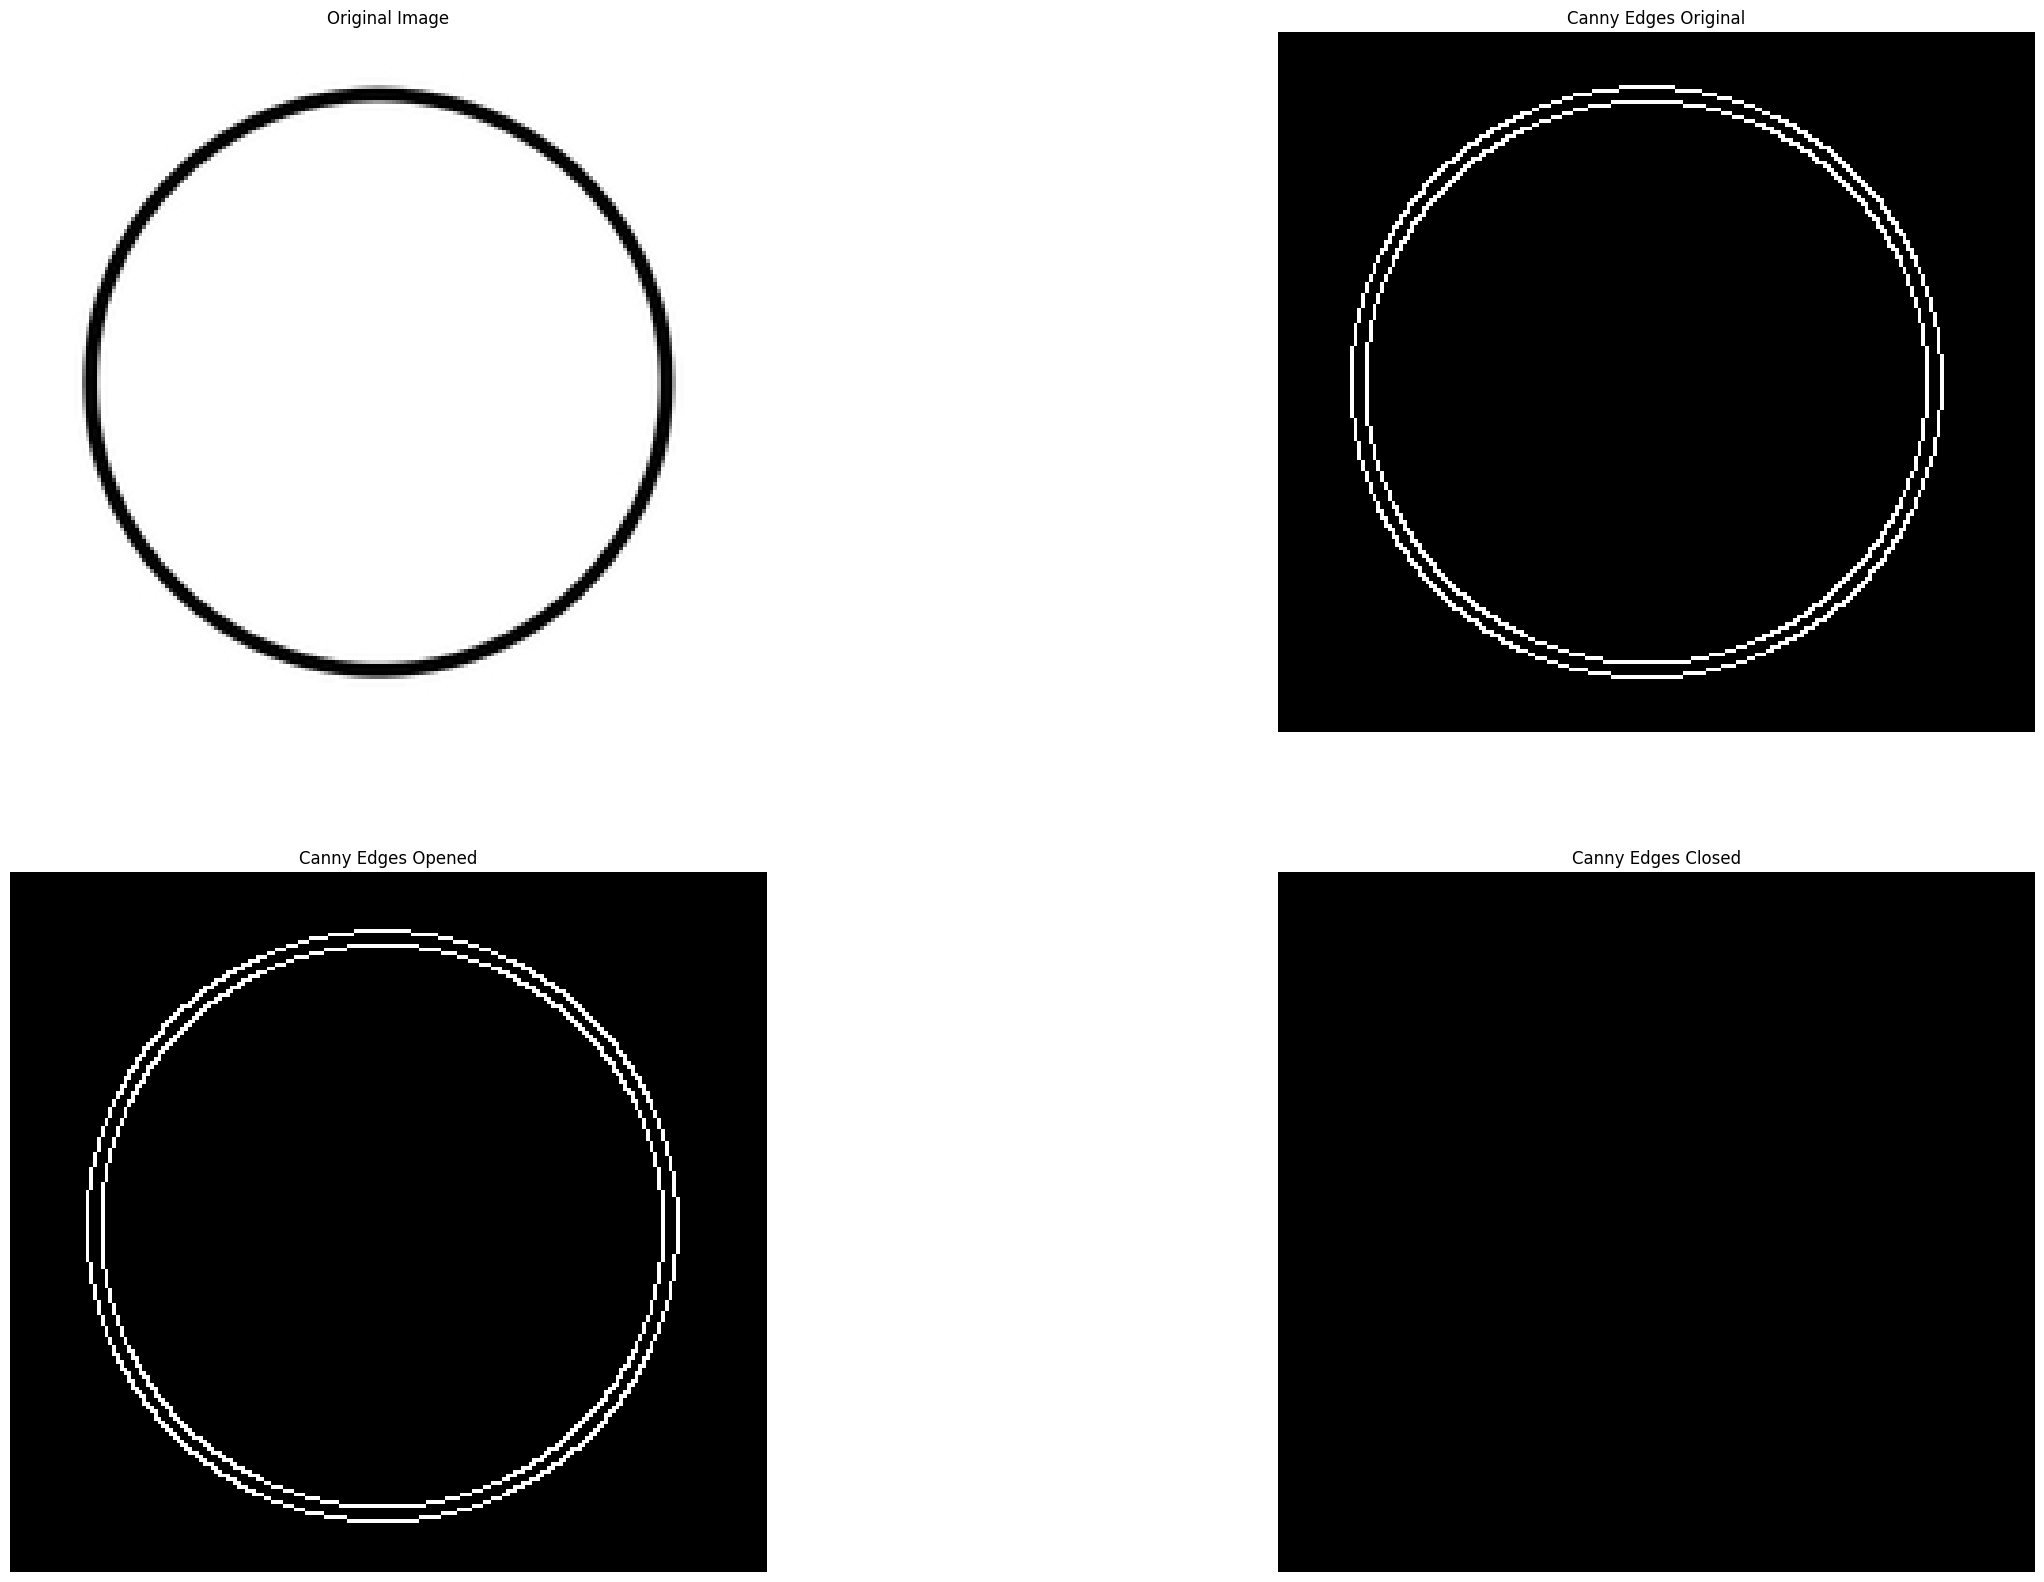

In [4]:
# guassian blur
imgBlur = cv2.GaussianBlur(image, (13, 13), 0)

# Apply Canny edge detection
edges_original = cv2.Canny(image, threshold1=150, threshold2=200, apertureSize=3)
edges_opened = cv2.Canny(opened_image, threshold1=70, threshold2=70, apertureSize=3)
edges_closed = cv2.Canny(closed_image, threshold1=200, threshold2=200, apertureSize=3)


# Display the original image and the edges within the notebook
plt.figure(figsize=(30, 20))

plt.subplot(2, 2, 1), plt.imshow(image)
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.axis("off")

plt.subplot(2, 2, 2), plt.imshow(edges_original, cmap="gray")
plt.title("Canny Edges Original"), plt.xticks([]), plt.yticks([])
plt.axis("off")

plt.subplot(2, 2, 3), plt.imshow(edges_opened, cmap="gray")
plt.title("Canny Edges Opened"), plt.xticks([]), plt.yticks([])
plt.axis("off")

plt.subplot(2, 2, 4), plt.imshow(edges_closed, cmap="gray")
plt.title("Canny Edges Closed"), plt.xticks([]), plt.yticks([])
plt.axis("off")

plt.show()

# Line detection with Hough Transform


(-0.5, 219.5, 219.5, -0.5)

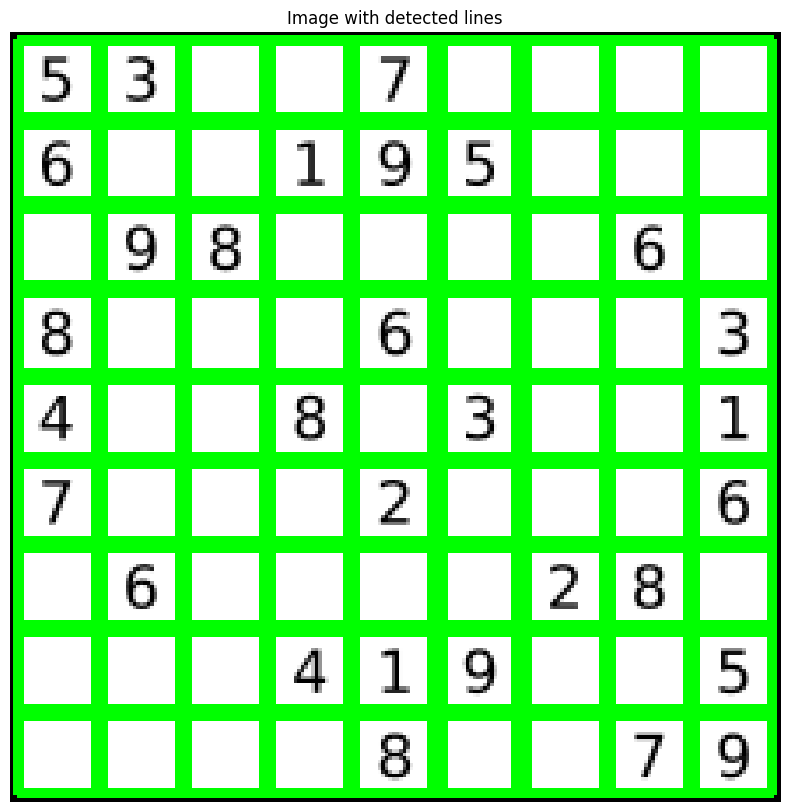

In [5]:
image = cv2.imread("images/Sudoku.png")

image_with_lines = image
# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Use canny edge detection
edges = cv2.Canny(gray, 100, 200, apertureSize=3)

# Apply HoughLinesP method to
# to directly obtain line end points
lines_list = []
lines = cv2.HoughLinesP(
    edges,  # Input edge image
    1,  # Distance resolution in pixels
    np.pi / 180,  # Angle resolution in radians
    threshold=60,  # Min number of votes for valid line
    minLineLength=4,  # Min allowed length of line
    maxLineGap=30,  # Max allowed gap between line for joining them
)

# Iterate over points
for points in lines:
    # Extracted points nested in the list
    x1, y1, x2, y2 = points[0]
    # Draw the lines joing the points
    # On the original image
    cv2.line(image_with_lines, (x1, y1), (x2, y2), (0, 255, 0), 2)
    # Maintain a simples lookup list for points
    lines_list.append([(x1, y1), (x2, y2)])

plt.figure(figsize=(20, 10))
plt.imshow(image_with_lines)
plt.title("Image with detected lines"), plt.xticks([]), plt.yticks([])
plt.axis("off")

# Circle detection with Hough Transform


(-0.5, 199.5, 184.5, -0.5)

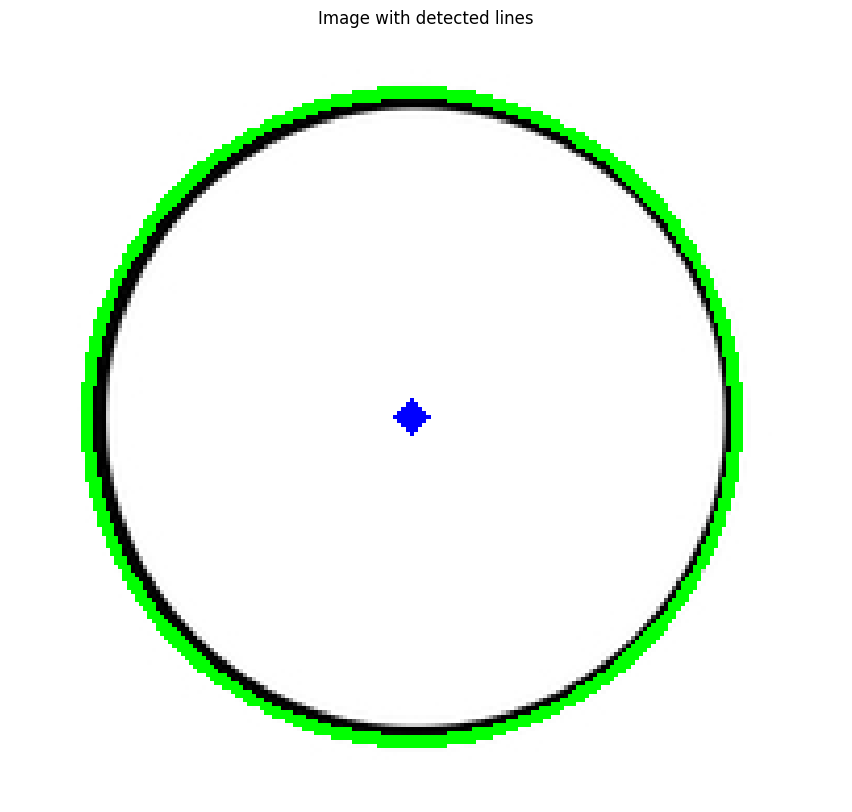

In [6]:
image = cv2.imread("images/circle.jpg")

image_with_lines = image
# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Use canny edge detection
edges = cv2.Canny(gray, 100, 200, apertureSize=3)


circles = cv2.HoughCircles(
    image=edges,  # Input image (edges)
    method=cv2.HOUGH_GRADIENT,  # Method for circle detection
    dp=1,  # Inverse ratio of accumulator resolution
    minDist=image.shape[0] / 32,  # Minimum distance between detected circle centers
    param1=200,  # Upper threshold for edge detection
    param2=60,  # Threshold for center detection
    minRadius=10,  # Minimum radius of the circles to be detected
    maxRadius=300,  # Maximum radius of the circles to be detected
)

# Draw detected circles
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # Draw outer circle
        cv2.circle(image_with_lines, (i[0], i[1]), i[2], (0, 255, 0), 2)
        # Draw inner circle
        cv2.circle(image_with_lines, (i[0], i[1]), 2, (0, 0, 255), 3)


plt.figure(figsize=(20, 10))
plt.imshow(image_with_lines)
plt.title("Image with detected lines"), plt.xticks([]), plt.yticks([])
plt.axis("off")

# Object detection with Generalised Hough Ballard Transform

# WIP


In [ ]:
# Load source image and grayscale template
image = cv2.imread("images/keys.jpg")
templ = cv2.imread("images/key.jpg", cv2.IMREAD_GRAYSCALE)

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create Ballard and set options
ballard = cv2.createGeneralizedHoughBallard()
ballard.setMinDist(10)
ballard.setLevels(360)
ballard.setDp(2)
ballard.setMaxBufferSize(1000)
ballard.setVotesThreshold(40)
ballard.setCannyLowThresh(30)
ballard.setCannyHighThresh(110)
ballard.setTemplate(templ)

# Execute Ballard detection
positionsBallard, votes = ballard.detect(gray_image)

# Draw Ballard
for i, pos in enumerate(positionsBallard):
    x, y, scale, angle = pos
    h, w = templ.shape
    rRect = cv2.RotatedRect((x, y), (w * scale, h * scale), angle)
    vertices = cv2.boxPoints(rRect).astype(np.int0)
    for i in range(4):
        cv2.line(
            image, tuple(vertices[i]), tuple(vertices[(i + 1) % 4]), (255, 0, 0), 6
        )

# Show the result image
plt.figure(figsize=(20, 10))
plt.imshow(image)
plt.title("Image with detected lines"), plt.xticks([]), plt.yticks([])
plt.axis("off")

# Object detection with Generalised Hough Guil Transform

# WIP


In [ ]:
# Load source image and grayscale template
image = cv2.imread("images/keys.jpg")
templ = cv2.imread("images/key.jpg", cv2.IMREAD_GRAYSCALE)

# Create grayscale image
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Create variables for location, scale, and rotation of detected templates
positionBallard, positionGuil = [], []

# Template width and height
w, h = templ.shape[::-1]

# Create Guil and set options
guil = cv2.createGeneralizedHoughGuil()
guil.setMinDist(10)
guil.setLevels(360)
guil.setDp(3)
guil.setMaxBufferSize(1000)
guil.setMinAngle(0)
guil.setMaxAngle(360)
guil.setAngleStep(1)
guil.setAngleThresh(1500)
guil.setMinScale(0.5)
guil.setMaxScale(2.0)
guil.setScaleStep(0.05)
guil.setScaleThresh(50)
guil.setPosThresh(10)
guil.setCannyLowThresh(30)
guil.setCannyHighThresh(110)
guil.setTemplate(templ)


# Execute Guil detection
guil.detect(gray_image)

# Draw Guil
for pos in positionGuil:
    rRect = cv2.RotatedRect((pos[0], pos[1]), (w * pos[2], h * pos[2]), pos[3])
    vertices = cv2.boxPoints(rRect).astype(np.int0)
    for i in range(4):
        cv2.line(
            image, tuple(vertices[i]), tuple(vertices[(i + 1) % 4]), (0, 255, 0), 2
        )

# Show the result image
plt.figure(figsize=(20, 10))
plt.imshow(image)
plt.title("Image with detected lines"), plt.xticks([]), plt.yticks([])
plt.axis("off")